<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Defect_clss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
#before doing these please make a folder as train data and in the train folder create another six folder for six defects
#These six folder should have 300 images.
try:
    source1 = "./drive/My Drive/NEU-CLS/train"
    os.mkdir("./drive/My Drive/NEU-CLS/test")
    dest11 = "./drive/My Drive/NEU-CLS/test"
    files = os.listdir(source1)
    
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.08)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


In [3]:
try:
    source1 = "./drive/My Drive/NEU-CLS/test"
    os.mkdir("./drive/My Drive/NEU-CLS/valid")
    dest11 = "./drive/My Drive/NEU-CLS/valid"
    files = os.listdir(source1)
    import shutil
    import numpy as np
    for f in files:
        os.mkdir(dest11 + '/'+ f)
        spilt_num=int(len(os.listdir(source1 + '/'+ f))*0.5)
        for i in os.listdir(source1 + '/'+ f)[spilt_num:]:
            shutil.move(source1 + '/'+ f +'/'+ i, dest11 + '/'+ f +'/'+ i)
except:
    print("\nEverything already have in the directory. You don't need to run this cell")


Everything already have in the directory. You don't need to run this cell


In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './drive/My Drive/NEU-CLS/train',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        './drive/My Drive/NEU-CLS/valid',
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 144 images belonging to 6 classes.
Found 828 images belonging to 6 classes.


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.978 ):
            print("\nReached 97.8% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [8]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=15,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/15
15/15 [==============================] - 506s 34s/step - loss: 3.7244 - accuracy: 0.1458 - val_loss: 1.7587 - val_accuracy: 0.3321
Epoch 2/15
15/15 [==============================] - 4s 244ms/step - loss: 1.7905 - accuracy: 0.1319 - val_loss: 1.6730 - val_accuracy: 0.2947
Epoch 3/15
15/15 [==============================] - 4s 247ms/step - loss: 1.8666 - accuracy: 0.2639 - val_loss: 1.6626 - val_accuracy: 0.3237
Epoch 4/15
15/15 [==============================] - 4s 246ms/step - loss: 1.5978 - accuracy: 0.3264 - val_loss: 1.6787 - val_accuracy: 0.2669
Epoch 5/15
15/15 [==============================] - 4s 245ms/step - loss: 1.4869 - accuracy: 0.4167 - val_loss: 2.0433 - val_accuracy: 0.3551
Epoch 6/15
15/15 [==============================] - 4s 243ms/step - loss: 1.5410 - accuracy: 0.4097 - val_loss: 1.4264 - val_accuracy: 0.5121
Epoch 7/15
15/15 [==============================] - 4s 247ms/step - loss: 1.2086 - accuracy: 0.6111 - val_loss: 1.5621 - val_accuracy: 0.5374
Epoch 

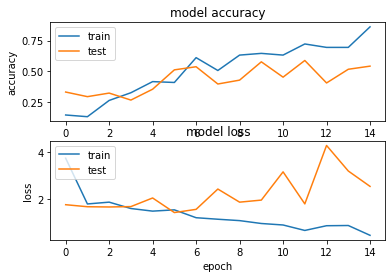

In [9]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [11]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir = './drive/My Drive/NEU-CLS/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [12]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [13]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [14]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (828, 200, 200, 3)


In [15]:
x_test = x_test.astype('float32')/255

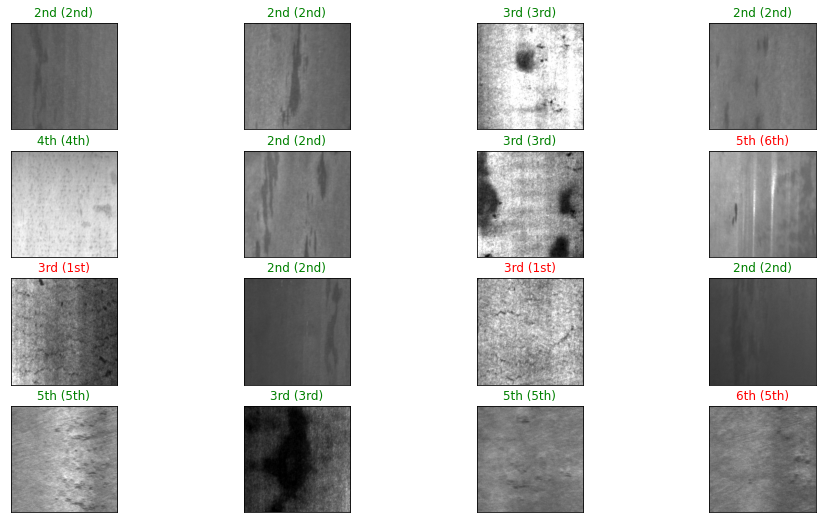

In [16]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))